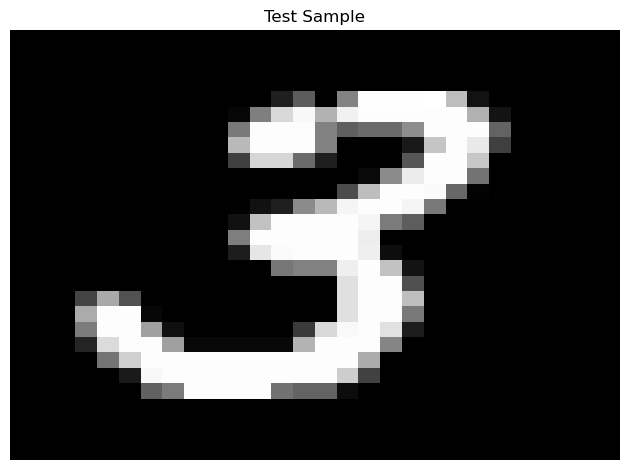

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  31  92
   0 131 254 254 254 255 189  18   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   6 127 216 248 178 241 253 253 253 253 253 177
  19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 121 253
 253 253 129  95 107 107 142 253 253 253  99   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 185 253 253 253 129   0   0   0  25 197
 253 233  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  63 214 214 107  31   0   0   0  86 253 253 199   

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
import cvxpy as cp
from scipy.optimize import minimize
import numpy.linalg as la
# Function to read MNIST data from CSV filey
def read_mnist_csv(filename):
    return pd.read_csv(filename, header=None).values[:, 1:]  # Exclude the label column

# Path to the MNIST dataset
data_path = "mnist_dataset"

# Read MNIST train and test images from CSV files
train_images = read_mnist_csv(os.path.join(data_path, 'mnist_train.csv'))
test_images = read_mnist_csv(os.path.join(data_path, 'mnist_test.csv'))

"""
print(train_images.shape) = (60000, 784)

"""

Test_sample = train_images[255]

# image show Test_sample
plt.imshow(Test_sample.reshape(-28, 28), cmap='gray', aspect = 'auto')
plt.title(f'Test Sample')
plt.axis('off')
plt.tight_layout()
plt.show()

print(Test_sample)

In [3]:
# count the number of non-zero entries in Test_sample
print(np.count_nonzero(Test_sample))

188


In [25]:
def generate_random_matrix(M, N, s):
    if M < 2 * s + 1:
        raise ValueError("Matrix dimensions do not satisfy the condition M >= 2s + 1.")
    
    # Generate a random matrix with elements from a Gaussian distribution N(0, 1/M)
    matrix = np.random.normal(loc=0, scale=1/np.sqrt(M), size=(M, N))
    
    # Ensure any 2s columns of A are linearly independent
    matrix[:, :2 * s] = np.linalg.qr(matrix[:, :2 * s])[0]
    
    # Normalize each column vector to ensure its L2 norm is 1
    for i in range(2 * s, N):
        column = matrix[:, i]
        matrix[:, i] = column / np.linalg.norm(column)
    
    return matrix

# Example usage:
M = 7  # Ensure M >= 2s + 1, let's choose M = 7
N = 10
s = 3  # Choose any value for s, ensuring it satisfies the condition
random_matrix = generate_random_matrix(M, N, s)



In [26]:
# print the l2 norm of each column vector
for i in range(N):
    column = random_matrix[:, i]
    print(np.linalg.norm(column))

0.9999999999999998
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999998
1.0


In [27]:
# print the dot product of each pair of column vectors
for i in range(N):
    for j in range(i+1, N):
        dot_product = np.dot(random_matrix[:, i], random_matrix[:, j])
        print(f"Dot product of column {i} and column {j}: {dot_product}")
        

Dot product of column 0 and column 1: 7.215011432473545e-17
Dot product of column 0 and column 2: -4.058060589104165e-17
Dot product of column 0 and column 3: -1.44349149286036e-16
Dot product of column 0 and column 4: 9.197841907079397e-17
Dot product of column 0 and column 5: 9.467130314127884e-18
Dot product of column 0 and column 6: 0.9365682444199595
Dot product of column 0 and column 7: -0.27000258964475
Dot product of column 0 and column 8: -0.508388993287738
Dot product of column 0 and column 9: -0.1598543430939681
Dot product of column 1 and column 2: 8.190989620968535e-17
Dot product of column 1 and column 3: -1.8567657694838038e-16
Dot product of column 1 and column 4: -7.589375774371384e-17
Dot product of column 1 and column 5: -3.794848995059648e-17
Dot product of column 1 and column 6: 0.16535561195368348
Dot product of column 1 and column 7: 0.30677264538486354
Dot product of column 1 and column 8: 0.4494465974781754
Dot product of column 1 and column 9: -0.7611771765875